I am going to use the following metric functions
1. closeness
2. degree
3. betweenness

In [1]:
import preprocessing as ps
import numpy as np
import networkx as nx
import pickle
import matplotlib.pyplot as plt
import random
random.seed(42)
import csv
import algos as al
import metrics as me

# random.seed(42)

In [2]:
# create the project networks
list_1 = [('DM', 'T'), ('DB', 'T'), ('AI', 'T')]
list_2 = [('DM', 'T'), ('DB', 'T'), ('AI', 'T'), ('DM', 'DB'), ('DM', 'AI'), ('DB', 'AI')]
list_3 = [('DM', 'T'), ('DB', 'T'), ('AI', 'DB')]

star_proj = ps.createProjectNetwork(list_1)
full_proj = ps.createProjectNetwork(list_2)
chain_proj = ps.createProjectNetwork(list_3)

metric_fn = me.compute_degree_centrality
main_network = pickle.load(open(f"./networks/new_subnets/10_nodes.pkl", 'rb'))
project_net = chain_proj
beta = None

In [3]:
import time

obj_max_1 = 0.0
best_set_1 = set()

network_main = main_network.copy()
print("Influential First")

influential_nodes = al.get_top_node_from_each_group(network_main.copy(), project_net, metric_fn)
start_time = time.time()
for node in influential_nodes:
    subset, comm_eff = al.Greedy(network_main.copy(), project_net, node, metric_fn=metric_fn, beta=beta)
    if comm_eff > obj_max_1:
        obj_max_1 = comm_eff
        best_set_1 = subset

end_time = time.time()
execution_time = end_time - start_time
print("Execution time:", execution_time, "seconds")

total_inf = sum(al.leader_eff(network_main.copy(), project_net, metric_fn, node, beta=beta) for node in best_set_1)
print("Coordinators communication efficiency", total_inf)
# print(f"Objective value : {obj_max_1}")

print("Intra-team ranking")
for node in list(best_set_1):
    print(f"Team :{network_main.copy().nodes[node]['label']}, Node: {node}, Rank: {al.intra_team_rank(network_main, metric_fn, node)}")

print("\n")

print("Inter-team ranking")
for node in list(best_set_1):
    print(f"Team :{network_main.copy().nodes[node]['label']}, Node: {node}, Rank: {al.inter_team_rank(network_main, project_net, metric_fn, node)}")

Influential First
{'Yabo Xu': 1.0, 'Chun Kit Chui': 1.0, 'Haibin Cheng': 1.0, 'Zhouxuan Teng': 1.0, 'Guofei Jiang': 1.0, 'Guillaume Wisniewski': 1.0, 'ErHeng Zhong': 1.0, 'Bing Liu': 1.0, 'Tianbing Xu': 1.0, 'Yuta Tsuboi': 1.0}
{'Stefan Dziembowski': 0.3333333333333333, 'Seth Gilbert': 0.4444444444444444, 'Ignaz Rutter': 0.4444444444444444, 'Jianer Chen': 0.1111111111111111, 'Brendan Lucier': 0.4444444444444444, 'Ravi Montenegro': 0.3333333333333333, 'Gordon T. Wilfong': 0.1111111111111111, 'F. Bruce Shepherd': 1.0, 'Siddharth Suri': 0.4444444444444444, 'Qi Cheng': 0.3333333333333333}
{'Salvatore T. March': 1.0, 'Tetsuo Mizoguchi': 1.0, 'Witold Staniszkis': 1.0, 'Stephen P. Morgan': 1.0, 'Giovanni Maria Sacco': 1.0, 'Y. H. Chin': 1.0, 'Yosihisa Udagawa': 1.0, 'Toshimi Minoura': 1.0, 'Michael V. Mannino': 1.0, 'Jacob Stein': 1.0}
{'Jürgen Schmidhuber': 0.8888888888888888, 'Jyrki Kivinen': 0.8888888888888888, 'Akira Maruoka': 0.1111111111111111, 'Eiji Takimoto': 1.0, 'Robert H. Sloan': 0

1. Team :DB, Node: Witold Staniszkis, Rank: 1
2. Team :T, Node: Siddharth Suri, Rank: 6
3. Team :AI, Node: Robert H. Sloan, Rank: 2
4. Team :DM, Node: Bing Liu, Rank: 1

1. Team :T, Node: Siddharth Suri, Rank: 6
2. Team :DM, Node: Bing Liu, Rank: 1
3. Team :DB, Node: Witold Staniszkis, Rank: 1
4. Team :AI, Node: Robert H. Sloan, Rank: 1

In [4]:
obj_max_2 = 0.0
best_set_2 = set()

network_main = main_network.copy()
print("Greedy Algorithm")

start_time = time.time()
for node in network_main.nodes():
    subset, comm_eff = al.Greedy(network_main.copy(), project_net, node, metric_fn=metric_fn, beta=beta)
    if comm_eff > obj_max_2:
        obj_max_2 = comm_eff
        best_set_2 = subset

end_time = time.time()
execution_time = end_time - start_time
print("Execution time:", execution_time, "seconds")

total_inf = sum(al.leader_eff(network_main.copy(), project_net, metric_fn, node, beta=beta) for node in best_set_2)
print("Coordinators communication efficiency", total_inf)
# print(f"Objective value : {obj_max_2}")

print("Intra-team ranking")
for node in list(best_set_2):
    print(f"Team :{network_main.copy().nodes[node]['label']}, Node: {node}, Rank: {al.intra_team_rank(network_main, metric_fn, node)}")

print("\n")

print("Inter-team ranking")
for node in list(best_set_2):
    print(f"Team :{network_main.copy().nodes[node]['label']}, Node: {node}, Rank: {al.inter_team_rank(network_main, project_net, metric_fn, node)}")

Greedy Algorithm
Execution time: 5.568620204925537 seconds
Coordinators communication efficiency 410.0
Intra-team ranking
Team :DB, Node: Salvatore T. March, Rank: 1
Team :T, Node: F. Bruce Shepherd, Rank: 1
Team :AI, Node: Eiji Takimoto, Rank: 1
Team :DM, Node: Haibin Cheng, Rank: 3


Inter-team ranking
Team :DB, Node: Salvatore T. March, Rank: 21
Team :T, Node: F. Bruce Shepherd, Rank: 21
Team :AI, Node: Eiji Takimoto, Rank: 11
Team :DM, Node: Haibin Cheng, Rank: 9


In [5]:
# Using Influence Team Strategy
network_main = main_network.copy()
al.inteam_influence_only(network_main, project_net, metric_fn)

{'Yabo Xu': 1.0, 'Chun Kit Chui': 1.0, 'Haibin Cheng': 1.0, 'Zhouxuan Teng': 1.0, 'Guofei Jiang': 1.0, 'Guillaume Wisniewski': 1.0, 'ErHeng Zhong': 1.0, 'Bing Liu': 1.0, 'Tianbing Xu': 1.0, 'Yuta Tsuboi': 1.0}
{'Stefan Dziembowski': 0.3333333333333333, 'Seth Gilbert': 0.4444444444444444, 'Ignaz Rutter': 0.4444444444444444, 'Jianer Chen': 0.1111111111111111, 'Brendan Lucier': 0.4444444444444444, 'Ravi Montenegro': 0.3333333333333333, 'Gordon T. Wilfong': 0.1111111111111111, 'F. Bruce Shepherd': 1.0, 'Siddharth Suri': 0.4444444444444444, 'Qi Cheng': 0.3333333333333333}
{'Salvatore T. March': 1.0, 'Tetsuo Mizoguchi': 1.0, 'Witold Staniszkis': 1.0, 'Stephen P. Morgan': 1.0, 'Giovanni Maria Sacco': 1.0, 'Y. H. Chin': 1.0, 'Yosihisa Udagawa': 1.0, 'Toshimi Minoura': 1.0, 'Michael V. Mannino': 1.0, 'Jacob Stein': 1.0}
{'Jürgen Schmidhuber': 0.8888888888888888, 'Jyrki Kivinen': 0.8888888888888888, 'Akira Maruoka': 0.1111111111111111, 'Eiji Takimoto': 1.0, 'Robert H. Sloan': 0.8888888888888888,

410.0

In [6]:
# Using Random Strategy
num_iter = 1000
network_main = main_network.copy()
al.randomMonteCarlo(network_main, project_net, metric_fn, num_iter)

317.22

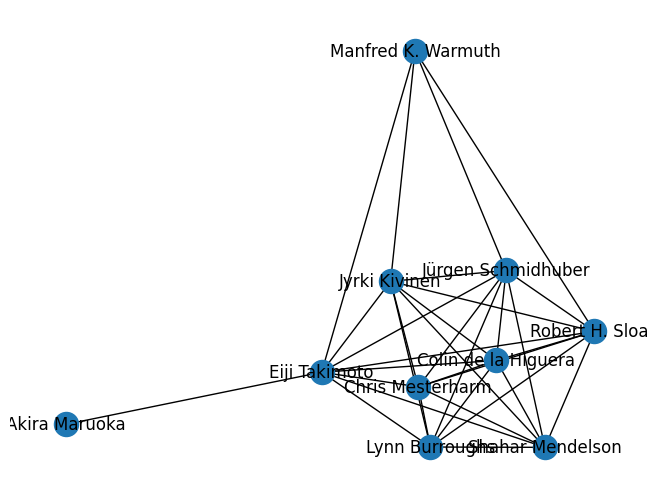

In [7]:
netty = ps.subgraph_by_same_label(network_main, "Jyrki Kivinen")
import matplotlib.pyplot as plt

# Plot the netty graph
nx.draw(netty, with_labels=True)
plt.show()

In [8]:
import pickle
cali_net = pickle.load(open('./networks/networks/graph_spa_500_0.pickle', 'rb'))

In [9]:
cali_net

In [10]:
cali_net.nodes(data=True)

NodeDataView({0: {'region': 'northwest_antelope_valley', 'ethnicity': 'other', 'age': '40-49', 'gender': 'male', 'status': 'obese'}, 1: {'region': 'northwest_antelope_valley', 'ethnicity': 'black', 'age': '30-39', 'gender': 'female', 'status': 'obese'}, 2: {'region': 'northwest_antelope_valley', 'ethnicity': 'white', 'age': '60-64', 'gender': 'male', 'status': 'overweight'}, 3: {'region': 'northwest_antelope_valley', 'ethnicity': 'white', 'age': '30-39', 'gender': 'female', 'status': 'obese'}, 4: {'region': 'northwest_antelope_valley', 'ethnicity': 'white', 'age': '65+', 'gender': 'female', 'status': 'obese'}, 5: {'region': 'northeast_antelope_valley', 'ethnicity': 'latino', 'age': '50-59', 'gender': 'male', 'status': 'overweight'}, 6: {'region': 'northeast_antelope_valley', 'ethnicity': 'latino', 'age': '30-39', 'gender': 'female', 'status': 'overweight'}, 7: {'region': 'northeast_antelope_valley', 'ethnicity': 'black', 'age': '65+', 'gender': 'female', 'status': 'obese'}, 8: {'region

In [11]:
import networkx as nx
unique_regions = len(set(nx.get_node_attributes(cali_net, 'region').values()))
print("Number of unique region values:", unique_regions)

Number of unique region values: 13


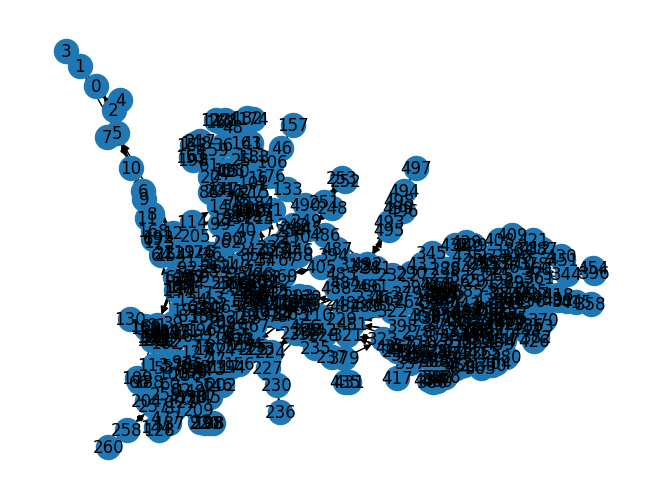

In [12]:
nx.draw(cali_net, with_labels=True)
plt.show()